In [ ]:
## 딥러닝 분류모델

In [76]:
### 타이타닉 생존 문제
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
df.info()
# adult_male만 넣고 embarked 이후로 다 빼기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [79]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [80]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male']]

In [81]:
## Null값 삭제
df = df.dropna()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    714 non-null    int64  
 1   pclass      714 non-null    int64  
 2   sex         714 non-null    object 
 3   age         714 non-null    float64
 4   sibsp       714 non-null    int64  
 5   parch       714 non-null    int64  
 6   fare        714 non-null    float64
 7   adult_male  714 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 45.3+ KB


In [83]:
onehot = pd.get_dummies(df[['sex', 'adult_male']], drop_first=True)

In [84]:
onehot = onehot.astype(int)
onehot

,adult_male,sex_male
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
885,0,0
886,1,1
887,0,0
889,1,1


In [85]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'adult_male'],
      dtype='object')

In [86]:
df_2 = df[['pclass', 'age', 'sibsp', 'parch', 'fare']]

In [87]:
## 원핫 인코딩 컬럼과 나머지 컬럼 합치기
X = pd.concat([df_2, onehot], axis=1)
y = tf.keras.utils.to_categorical(df['survived'])

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=1)

In [114]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(499, 7) (215, 7)
(499, 2) (215, 2)


In [90]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(7,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [92]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5993 - loss: 1.0994 - val_acc: 0.6698 - val_loss: 0.6814
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7063 - loss: 0.6968 - val_acc: 0.7302 - val_loss: 0.5773
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7283 - loss: 0.6086 - val_acc: 0.7163 - val_loss: 0.5446
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6771 - loss: 0.5777 - val_acc: 0.7581 - val_loss: 0.5201
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7577 - loss: 0.5225 - val_acc: 0.7721 - val_loss: 0.5113
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7145 - loss: 0.5447 - val_acc: 0.6140 - val_loss: 0.8323
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6599 - loss: 0.7638 - val_acc: 0.6884 - val_loss: 0.6193
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6899 - loss: 0.6322 - val_acc: 0.7535 - val_loss: 0.5375
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7382 - loss:

In [108]:
pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step


In [109]:
pred

array([[0.00208685, 0.9979132 ],
       [0.8492017 , 0.15079826],
       [0.25022197, 0.74977803],
       [0.13569373, 0.8643062 ],
       [0.88683945, 0.1131606 ],
       [0.8384128 , 0.16158715],
       [0.24116184, 0.7588381 ],
       [0.74052185, 0.2594781 ],
       [0.8377004 , 0.16229957],
       [0.85515773, 0.14484234],
       [0.7434892 , 0.25651082],
       [0.88426906, 0.11573097],
       [0.928364  , 0.07163604],
       [0.86807597, 0.13192399],
       [0.88914835, 0.11085162],
       [0.3226032 , 0.6773968 ],
       [0.9108518 , 0.08914816],
       [0.88872194, 0.11127808],
       [0.89411455, 0.10588545],
       [0.91175663, 0.08824334],
       [0.8837473 , 0.11625269],
       [0.96257675, 0.03742321],
       [0.94436306, 0.05563698],
       [0.7203488 , 0.27965122],
       [0.89264935, 0.1073507 ],
       [0.8887271 , 0.11127295],
       [0.927143  , 0.07285697],
       [0.03936656, 0.9606335 ],
       [0.29579002, 0.7042099 ],
       [0.85706574, 0.14293428],
       [0.

In [110]:
print(np.argmax(y_test[0]), np.argmax(pred[0]))

1 1


In [111]:
print("Shape of y_test:", y_test.shape)
print("Shape of pred:", pred.shape)

Shape of y_test: (215, 2)
Shape of pred: (215, 2)


In [112]:
loss, accuracy = model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8347 - loss: 0.4306 


In [113]:
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Test Loss: 0.4240446090698242
Test Accuracy: 0.8186046481132507


MNIST 분류 모델 만들기

In [211]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [212]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


2


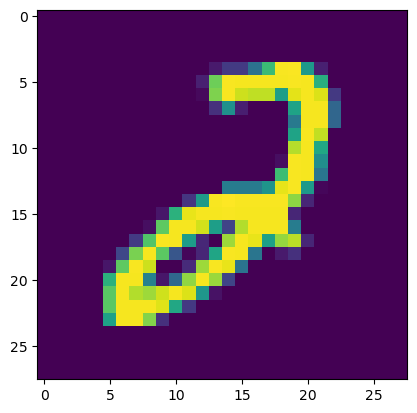

In [213]:
idx = 457
print(y_train[idx])
plt.imshow(X_train[idx,:])
plt.show()

In [214]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [215]:
## min-max scaling
X_train = X_train / 255
X_test = X_test / 255

In [216]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [217]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [218]:
## 모델 만들기
from tensorflow.keras.layers import Dense
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(Dense(128, input_shape=(28,28), activation='relu')) # 이미지 1장에 대한 shape 정보
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# 출력층
model.add(Dense(10, activation='softmax'))

In [219]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['acc'])

In [220]:
history = model.fit(X_train, y_train,
                   validation_split=0.3,
                   epochs=50)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.8051 - loss: 0.6208 - val_acc: 0.9524 - val_loss: 0.1574
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9603 - loss: 0.1308 - val_acc: 0.9611 - val_loss: 0.1350
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9755 - loss: 0.0807 - val_acc: 0.9639 - val_loss: 0.1222
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9792 - loss: 0.0665 - val_acc: 0.9629 - val_loss: 0.1291
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9827 - loss: 0.0542 - val_acc: 0.9684 - val_loss: 0.1069
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9883 - loss: 0.0391 - val_acc: 0.9708 - val_loss: 0.1080
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9902 - loss: 0.0322 - val_acc: 0.9728 - val_loss: 0.1093
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9900 - loss: 0.0286 - val_acc: 0.9714 - val_loss: 0.1134
Epoch 9/50
1313/1313 ━━━━━━━━━━━━━━━━━━━

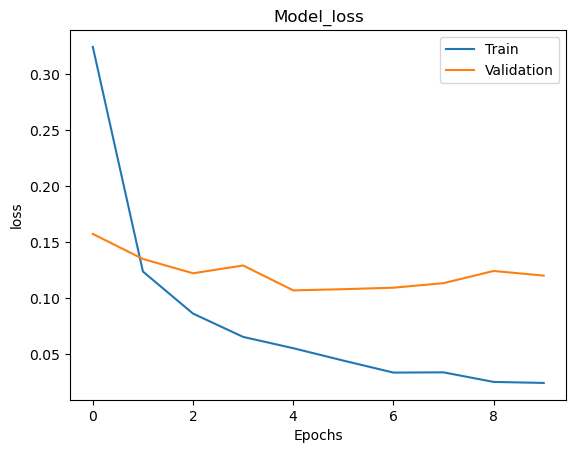

In [224]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][:10], label='Train')
plt.plot(history.history['val_loss'][:10], label='Validation')
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 과적합 발생

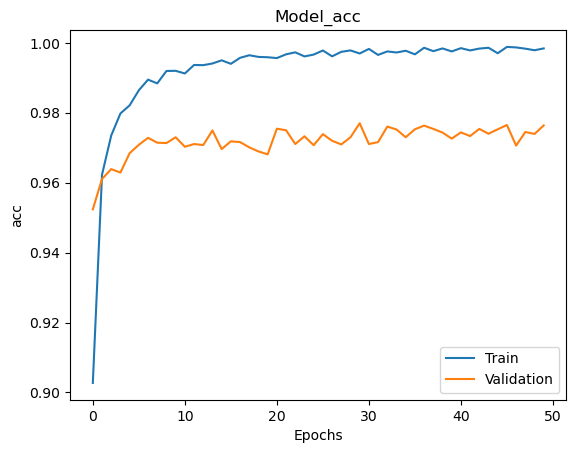

In [225]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Validation')
plt.title('Model_acc')
plt.ylabel('acc')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 과적합 발생

In [226]:
# 시각화

class_names = np.arange(10).astype('str')

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [227]:
pro_model = tf.keras.Sequential([model,
                                 tf.keras.layers.Softmax()])
predictions = pro_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


In [228]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step


In [229]:
def show_img(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], y_test)
    plt.show()

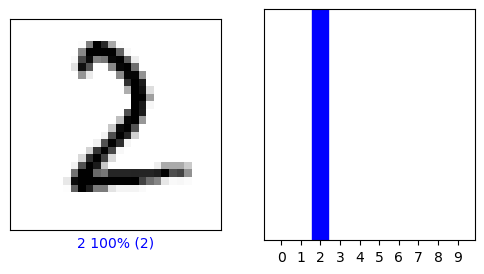

In [238]:
show_img(512)

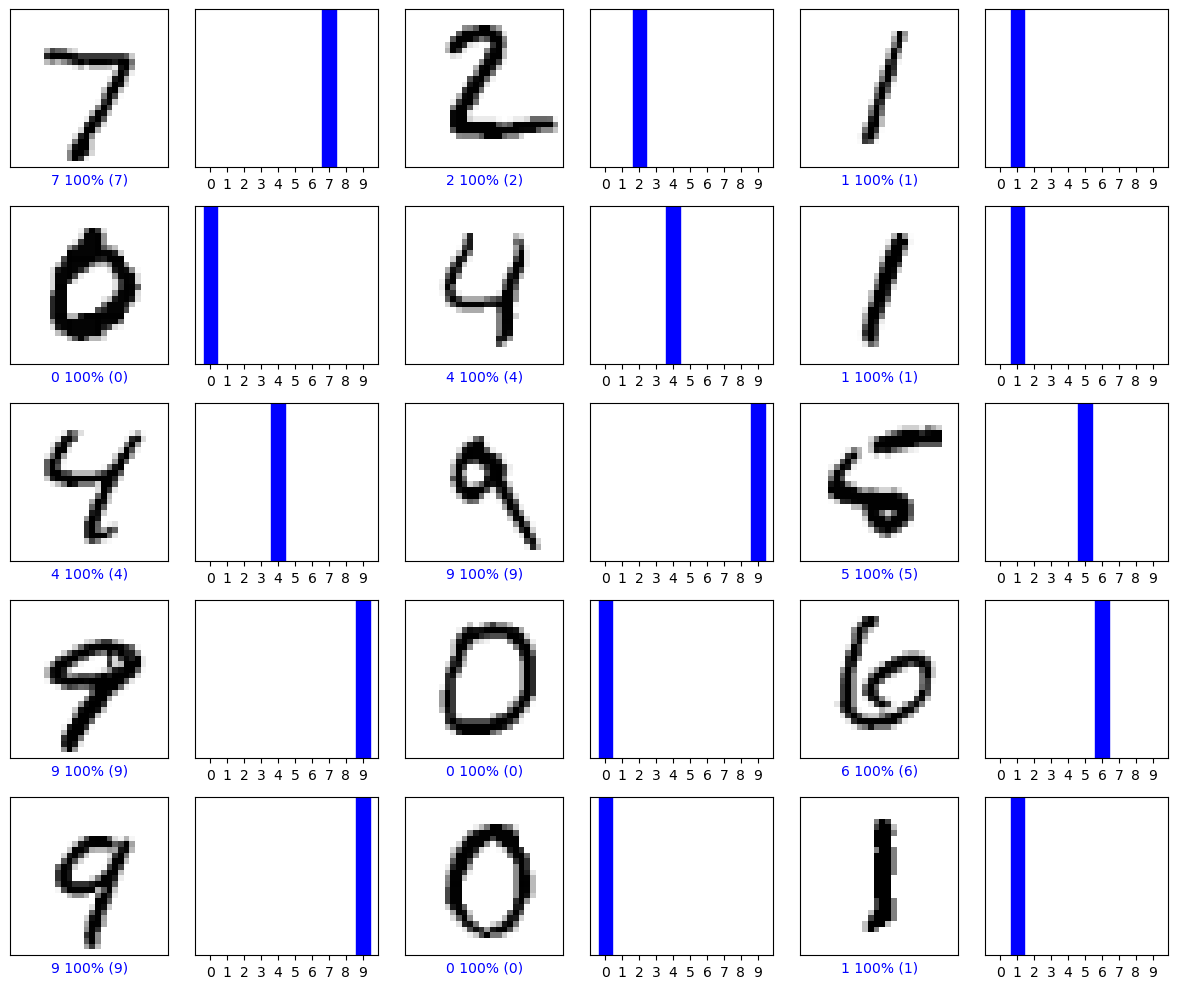

In [239]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()